In [1]:
#importing Neccesary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive

In [3]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
df = pd.read_excel('/content/drive/MyDrive/Data.xlsx')
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10677,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10678,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10679,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10680,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [5]:
df.isnull().sum()/100

Airline            0.00
Date_of_Journey    0.00
Source             0.00
Destination        0.00
Route              0.01
Dep_Time           0.00
Arrival_Time       0.00
Duration           0.00
Total_Stops        0.01
Additional_Info    0.00
Price              0.00
dtype: float64

In [6]:
df.isna().sum()/100

Airline            0.00
Date_of_Journey    0.00
Source             0.00
Destination        0.00
Route              0.01
Dep_Time           0.00
Arrival_Time       0.00
Duration           0.00
Total_Stops        0.01
Additional_Info    0.00
Price              0.00
dtype: float64

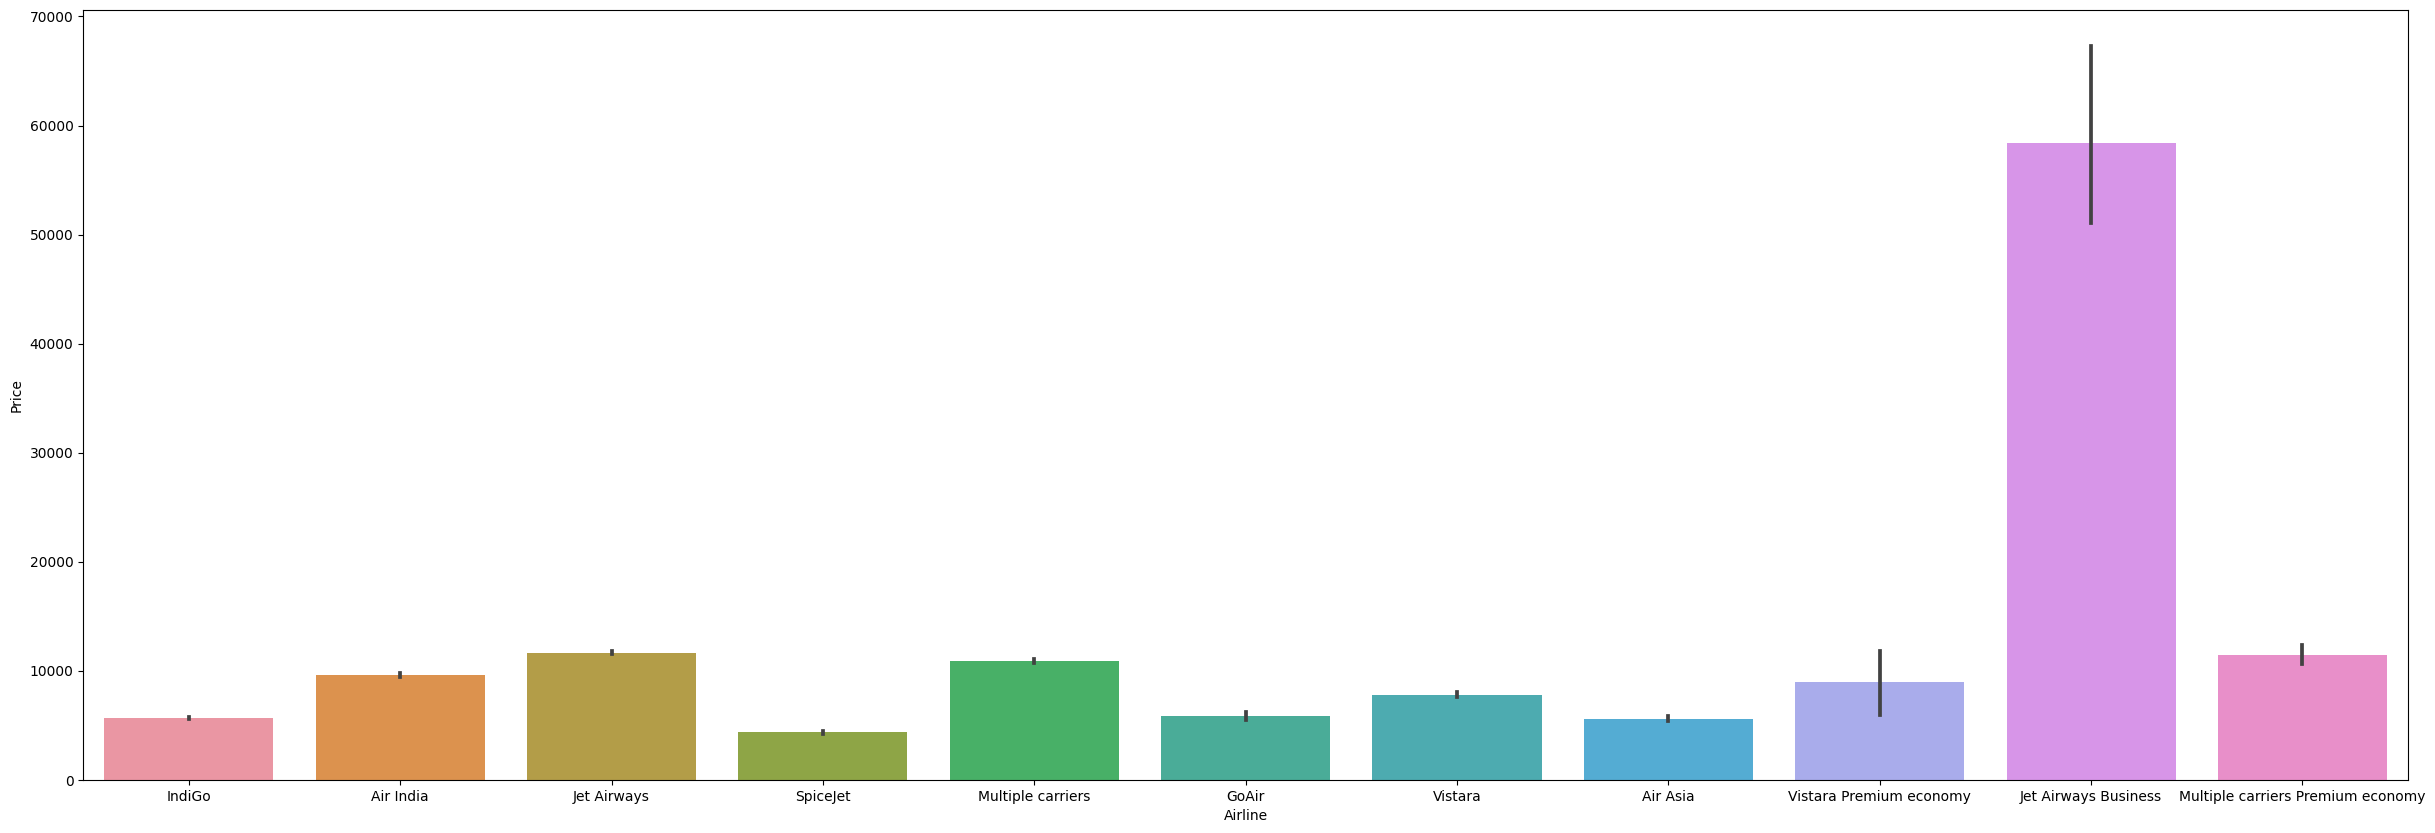

In [7]:
plt.figure(figsize=(30,10))
sns.barplot(x="Airline",y='Price', data=df)
plt.show()

<Axes: xlabel='Price', ylabel='Density'>

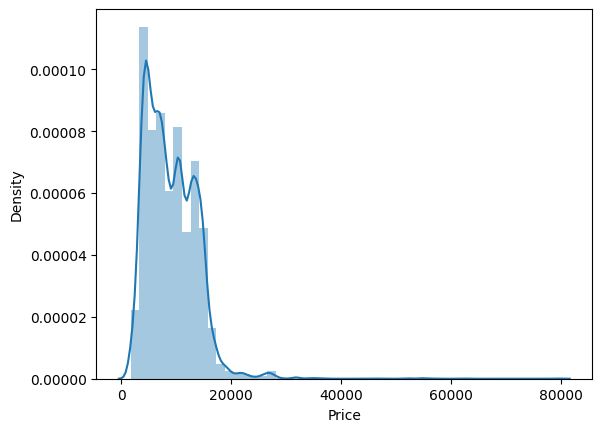

In [8]:
sns.distplot(df['Price'])

In [9]:
# Normalize the training, validation, and test data
#categorical_cols = "Airline","Source","Destination","Route","Arrival_Time","Duration","Total_Stops","Additional_Info"
df.drop(["Airline","Route","Arrival_Time","Additional_Info","Date_of_Journey"],axis=1)

,Source,Destination,Dep_Time,Duration,Total_Stops,Price
0,Banglore,New Delhi,22:20,2h 50m,non-stop,3897
1,Kolkata,Banglore,05:50,7h 25m,2 stops,7662
2,Delhi,Cochin,09:25,19h,2 stops,13882
3,Kolkata,Banglore,18:05,5h 25m,1 stop,6218
4,Banglore,New Delhi,16:50,4h 45m,1 stop,13302
...,...,...,...,...,...,...
10677,Kolkata,Banglore,19:55,2h 30m,non-stop,4107
10678,Kolkata,Banglore,20:45,2h 35m,non-stop,4145
10679,Banglore,Delhi,08:20,3h,non-stop,7229
10680,Banglore,New Delhi,11:30,2h 40m,non-stop,12648


In [10]:
df['Total_Stops'].value_counts()

1 stop      5624
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

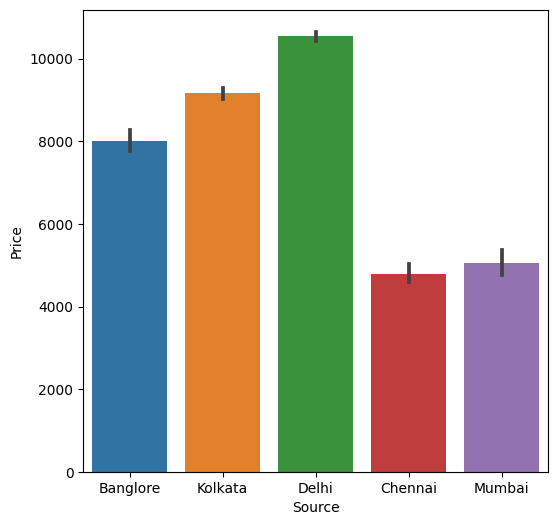

In [11]:
plt.figure(figsize=(6,6))
sns.barplot(x="Source",y='Price', data=df)
plt.show()

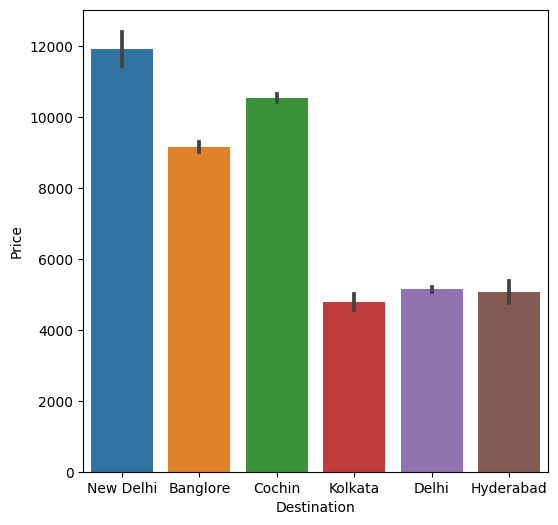

In [12]:
plt.figure(figsize=(6,6))
sns.barplot(x="Destination",y='Price', data=df)
plt.show()

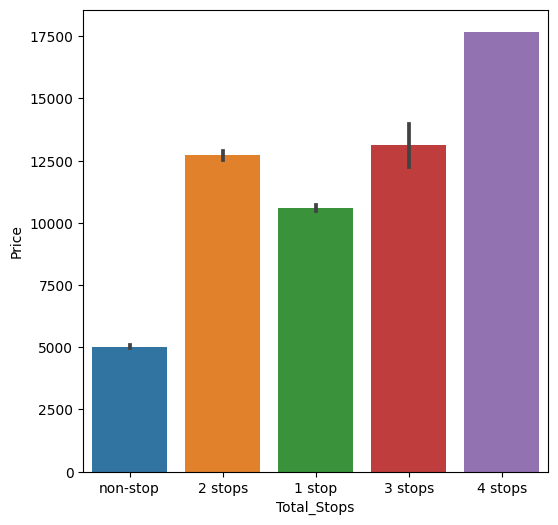

In [13]:
plt.figure(figsize=(6,6))
sns.barplot(x="Total_Stops",y='Price', data=df)
plt.show()

**Data Preprocessing:**

In [14]:
duration = list(df["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

In [15]:
df["Duration_hours"] = duration_hours
df["Duration_mins"] = duration_mins

df=df.drop(['Duration'],axis=1)

In [16]:
df.replace({'Total_Stops':{'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4}},inplace=True)

In [17]:
Airline = df[["Airline"]]

Airline = pd.get_dummies(Airline, drop_first= True)


Source = df[["Source"]]

Source = pd.get_dummies(Source, drop_first= True)


Destination = df[["Destination"]]

Destination = pd.get_dummies(Destination, drop_first= True)

In [18]:
df = pd.concat([df, Airline, Source, Destination], axis = 1)
df=df.drop(['Airline','Source','Destination'],axis=1)

<Axes: >

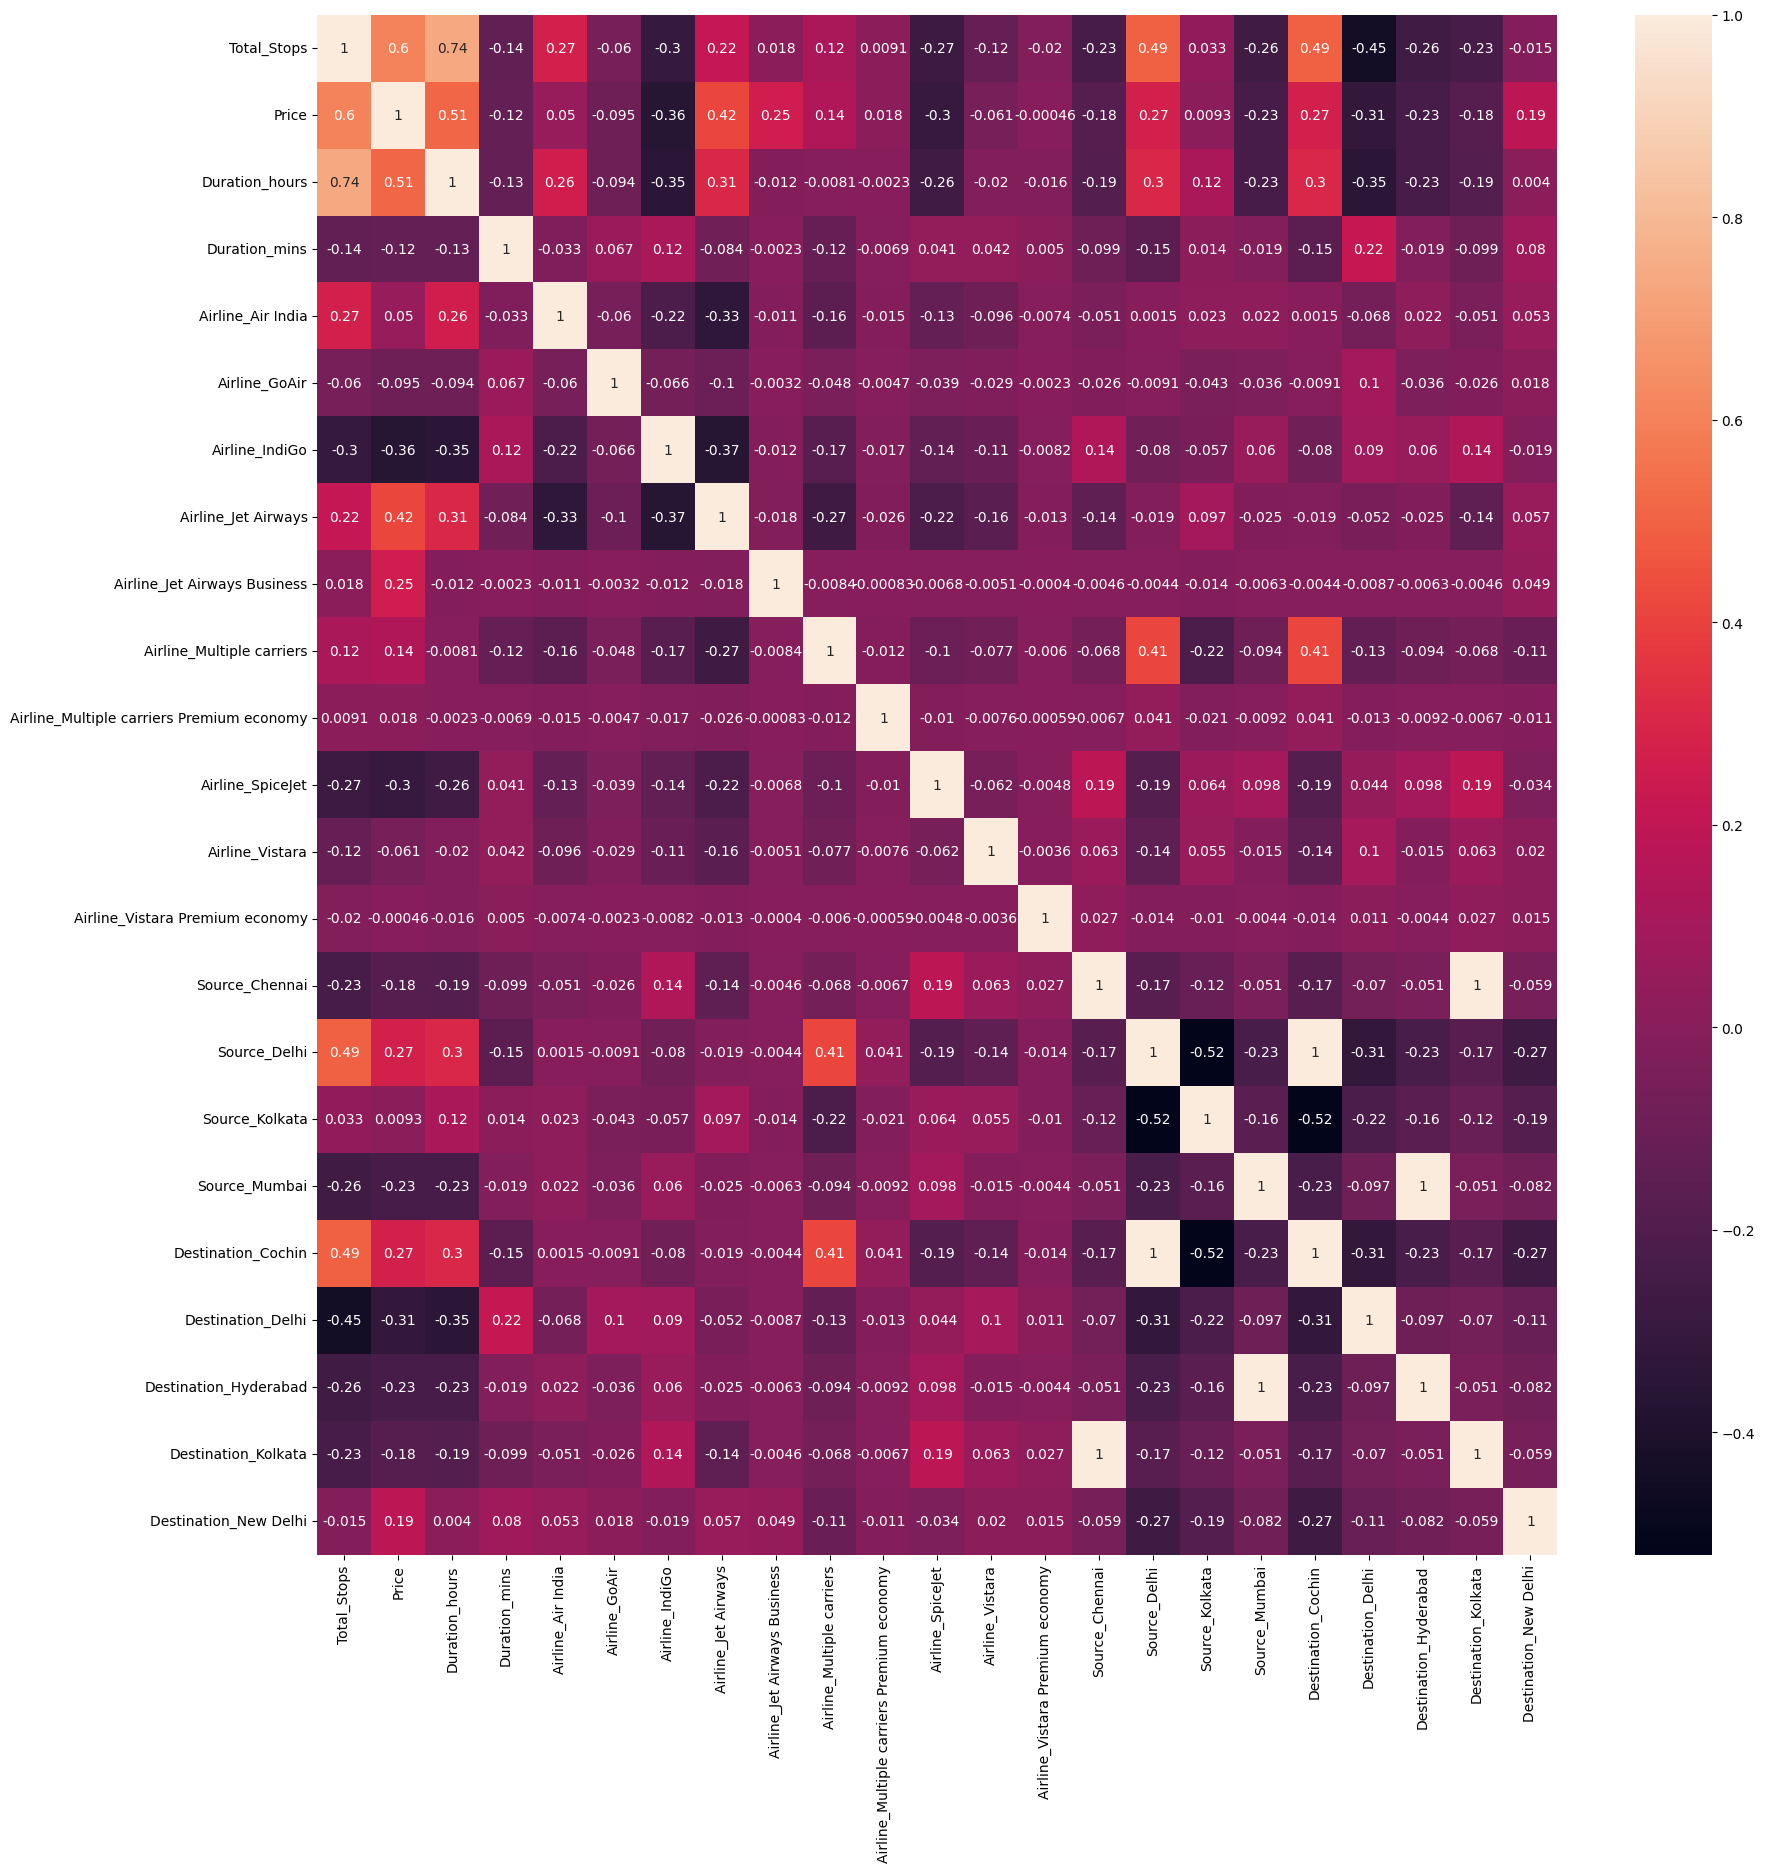

In [19]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
X = df.drop('Price',axis=1)  # Features
y = df['Price']  # Labels

In [45]:
# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.33, random_state=42)

In [46]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(X_train)
x_test = sc.transform(X_test)

In [47]:
# Define the neural network architecture
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
    ])

In [48]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [49]:
model.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
234/234 [==============================] - 3s 2ms/step - loss: nan
Epoch 2/100
234/234 [==============================] - 0s 2ms/step - loss: nan
Epoch 3/100
234/234 [==============================] - 1s 3ms/step - loss: nan
Epoch 4/100
234/234 [==============================] - 1s 3ms/step - loss: nan
Epoch 5/100
234/234 [==============================] - 1s 3ms/step - loss: nan
Epoch 6/100
234/234 [==============================] - 1s 2ms/step - loss: nan
Epoch 7/100
234/234 [==============================] - 0s 2ms/step - loss: nan
Epoch 8/100
234/234 [==============================] - 0s 2ms/step - loss: nan
Epoch 9/100
234/234 [==============================] - 0s 2ms/step - loss: nan
Epoch 10/100
234/234 [==============================] - 1s 3ms/step - loss: nan
Epoch 11/100
234/234 [==============================] - 1s 3ms/step - loss: nan
Epoch 12/100
234/234 [==============================] - 2s 9ms/step - loss: nan
Epoch 13/100
234/234 [===========================

In [52]:
loss = model.evaluate(X_test, y_test)
print("Test Loss:", loss)

34/34 [==============================] - 0s 4ms/step - loss: nan
Test Loss: nan
